## Exploratory Data Analysis of Movie data, Constructing a Hypothesis and Hypothesis Testing

I am data scientist at SussexBudgetProduction. The last movie produced by the company was a comedy-action-thriller with budget 500K but it failed at box office with just 100K. The CEO of company wants to ensure successful and good return from the next movie to convince investors to give 1.5 million for funding. 

As a data scientist my task is to analyse IMDB movie data csv file and to provide a data driven actionable plan to the company to ensure movie success.
Commercial success of a movie not only entertains audience, but also enables film companies to gain tremendous profit. A lot of factors such as good directors, experienced actors, audience apealing story are considerable for creating good movies. 

However it is not guarantee that famous directors and actors always bring an expected box office income. I will explore what other factors like genres are more helpful to make movie successful on box office. I will also try to find how budget, gross and IMDB score are helpful to give a big success with in budget limit of 1.5 million GBP.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing libraries for data analysis

#### Using Pandas : the Python Data Analysis library
Pandas provides much of the functionality needed to import and analyse tabular data as standard.



In [ ]:
#standard imports for when working with pandas
import numpy as np
#matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

### Load Data

In [ ]:
# Access movie_metadata.csv file 
#myfile='movie_metadata.csv'

myfile = '/content/drive/MyDrive/Colab Notebooks/sussex_DSRM/T1_week7/movie_metadata.csv'

#read the movie metadata file into a dataframe in pandas.
df = pd.read_csv(myfile,index_col=None)


### Data Exploration

In [ ]:
#display the 'head' of the data, default first 5 rows
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
# Using tail() to display last 5 rows of data
df.tail()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
5042,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


## Exploratory Data Analysis

The info() method prints information about the DataFrame.

The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

We can also use df.dtypes attribute to see data types of columns.

In [ ]:
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

The df.shape attribute in Pandas enables us to obtain the shape of a DataFrame that is number of rows and columns of a given DataFrame. Below it's showing there are 5043 rows and 28 columns in this dataframe.

In [ ]:
# df.shape to find number of rows and columns of a given dataframe.
df.shape

(5043, 28)

In [ ]:
# To see columns of dataframe use df.columns
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

We can find the distinct values of a categorical variable (e.g., 'country', 'genres'), using unique()

In [ ]:
df['country'].unique()

array(['USA', 'UK', nan, 'New Zealand', 'Canada', 'Australia', 'Belgium',
       'Japan', 'Germany', 'China', 'France', 'New Line', 'Mexico',
       'Spain', 'Hong Kong', 'Czech Republic', 'India', 'Soviet Union',
       'South Korea', 'Peru', 'Italy', 'Russia', 'Aruba', 'Denmark',
       'Libya', 'Ireland', 'South Africa', 'Iceland', 'Switzerland',
       'Romania', 'West Germany', 'Chile', 'Netherlands', 'Hungary',
       'Panama', 'Greece', 'Sweden', 'Norway', 'Taiwan', 'Official site',
       'Cambodia', 'Thailand', 'Slovakia', 'Bulgaria', 'Iran', 'Poland',
       'Georgia', 'Turkey', 'Nigeria', 'Brazil', 'Finland', 'Bahamas',
       'Argentina', 'Colombia', 'Israel', 'Egypt', 'Kyrgyzstan',
       'Indonesia', 'Pakistan', 'Slovenia', 'Afghanistan',
       'Dominican Republic', 'Cameroon', 'United Arab Emirates', 'Kenya',
       'Philippines'], dtype=object)

We can find the number of distinct values using nunique()

In [ ]:
df['country'].nunique()

65

By using unique() and nunique() function, I found there are 65 unique countries but one value is NaN so there are 64 unique countries in this movie dataset.

Now let's see distinct values of 'genres' using unique() and find the number the unique values using nunique()

In [ ]:
df['genres'].unique()

array(['Action|Adventure|Fantasy|Sci-Fi', 'Action|Adventure|Fantasy',
       'Action|Adventure|Thriller', 'Action|Thriller', 'Documentary',
       'Action|Adventure|Sci-Fi', 'Action|Adventure|Romance',
       'Adventure|Animation|Comedy|Family|Fantasy|Musical|Romance',
       'Adventure|Family|Fantasy|Mystery', 'Action|Adventure',
       'Action|Adventure|Western', 'Action|Adventure|Family|Fantasy',
       'Action|Adventure|Comedy|Family|Fantasy|Sci-Fi',
       'Adventure|Fantasy', 'Action|Adventure|Drama|History',
       'Adventure|Family|Fantasy', 'Action|Adventure|Drama|Romance',
       'Drama|Romance', 'Action|Adventure|Sci-Fi|Thriller',
       'Action|Adventure|Fantasy|Romance',
       'Action|Adventure|Fantasy|Sci-Fi|Thriller',
       'Adventure|Animation|Comedy|Family|Fantasy',
       'Adventure|Animation|Comedy|Family|Sport', 'Action|Crime|Thriller',
       'Action|Adventure|Horror|Sci-Fi|Thriller',
       'Adventure|Animation|Family|Sci-Fi',
       'Action|Comedy|Crime|Thrille

In [ ]:
df['genres'].nunique()

914

There are 914 unique genre combinations in this dataset

### Finding duplicates

There are 45 duplicated rows in this dataset. I will drop them by using drop_duplicated(). Now 4998 rows left.

In [ ]:
# find duplicate rows in dataset
df[df.duplicated()]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
137,Color,David Yates,248.0,110.0,282.0,103.0,Alexander Skarsgård,11000.0,124051759.0,Action|Adventure|Drama|Romance,...,239.0,English,USA,PG-13,180000000.0,2016.0,10000.0,6.6,2.35,29000
187,Color,Bill Condon,322.0,115.0,386.0,12000.0,Kristen Stewart,21000.0,292298923.0,Adventure|Drama|Fantasy|Romance,...,329.0,English,USA,PG-13,120000000.0,2012.0,17000.0,5.5,2.35,65000
204,Color,Hideaki Anno,1.0,120.0,28.0,12.0,Shin'ya Tsukamoto,544.0,NaN,Action|Adventure|Drama|Horror|Sci-Fi,...,13.0,Japanese,Japan,NaN,NaN,2016.0,106.0,8.2,2.35,0
303,Color,Joe Wright,256.0,111.0,456.0,394.0,Cara Delevingne,20000.0,34964818.0,Adventure|Family|Fantasy,...,186.0,English,USA,PG,150000000.0,2015.0,548.0,5.8,2.35,24000
389,Color,Josh Trank,369.0,100.0,128.0,78.0,Reg E. Cathey,596.0,56114221.0,Action|Adventure|Sci-Fi,...,695.0,English,USA,PG-13,120000000.0,2015.0,360.0,4.3,2.35,41000
395,Color,Rob Cohen,187.0,106.0,357.0,4000.0,Vin Diesel,23000.0,144512310.0,Action|Crime|Thriller,...,988.0,English,USA,PG-13,38000000.0,2001.0,14000.0,6.7,2.35,14000
590,Color,Brett Ratner,245.0,101.0,420.0,467.0,Rufus Sewell,12000.0,72660029.0,Action|Adventure,...,269.0,English,USA,PG-13,100000000.0,2014.0,3000.0,6.0,2.35,21000
656,Color,Paul Verhoeven,196.0,113.0,719.0,217.0,Rachel Ticotin,605.0,119412921.0,Action|Sci-Fi,...,391.0,English,USA,R,65000000.0,1990.0,308.0,7.5,1.85,0
794,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
1220,Color,Angelina Jolie Pitt,322.0,137.0,11000.0,465.0,Jack O'Connell,769.0,115603980.0,Biography|Drama|Sport|War,...,351.0,English,USA,PG-13,65000000.0,2014.0,698.0,7.2,2.35,35000


In [ ]:
df.drop_duplicates() # drop duplicates from dataset

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


### Data Cleaning 

This is the process of dealing with missing values, null values, adding or removal of columns 

By using isnull(), and sum() we can see null value in each column in dataframe. 

In [ ]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [ ]:
df.isna().sum().sum() # will return sum of all null value count in whole dataframe

2698

Now I will check if I drop rows from budget and gross columns because they have highest nulls. After dropping I have still 3891 rows left that is 77.8% of dataset.

In [ ]:
df2 = df.dropna(subset = ['budget'])

In [ ]:
df2.shape

(4551, 28)

In [ ]:
df2 = df2.dropna(subset = ['gross'])

In [ ]:
df2.shape

(3891, 28)

Here we can see that I have very less null values now.

In [ ]:
df2.isnull().sum()

color                         2
director_name                 0
num_critic_for_reviews        1
duration                      1
director_facebook_likes       0
actor_3_facebook_likes       10
actor_2_name                  5
actor_1_facebook_likes        3
gross                         0
genres                        0
actor_1_name                  3
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                 10
facenumber_in_poster          6
plot_keywords                31
movie_imdb_link               0
num_user_for_reviews          0
language                      3
country                       0
content_rating               51
budget                        0
title_year                    0
actor_2_facebook_likes        5
imdb_score                    0
aspect_ratio                 75
movie_facebook_likes          0
dtype: int64

Now aspect_ratio has highest null. I will explore aspect_ratio column to deal with null value. As we see there are 2 most common values 2.35 and 1.85

In [ ]:
df2['aspect_ratio'].value_counts()

2.35     2014
1.85     1613
1.37       50
1.78       41
1.66       40
1.33       19
2.20       11
2.39       11
2.00        3
2.40        3
2.76        3
1.75        2
1.18        1
2.55        1
1.77        1
1.50        1
2.24        1
16.00       1
Name: aspect_ratio, dtype: int64

In [ ]:
df2['aspect_ratio'].mean()

2.1097510482180297

If I will replace null with 1.85 value so lets see how it will change the mean of aspect_ratio column

In [ ]:

df2['aspect_ratio'].fillna(1.85, inplace = True)

As we can see that still mean is not change that much.

In [ ]:
df2['aspect_ratio'].mean()

2.104744281675662

I will fill 51 null values in content_rating with most common rating 'R'

In [ ]:
df2['content_rating'].value_counts()

R            1737
PG-13        1331
PG            576
G              91
Not Rated      42
Unrated        24
Approved       17
X              10
NC-17           6
Passed          3
M               2
GP              1
Name: content_rating, dtype: int64

In [ ]:
df2['content_rating'].fillna('R', inplace = True)

In [ ]:
df2.isnull().sum()

color                         2
director_name                 0
num_critic_for_reviews        1
duration                      1
director_facebook_likes       0
actor_3_facebook_likes       10
actor_2_name                  5
actor_1_facebook_likes        3
gross                         0
genres                        0
actor_1_name                  3
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                 10
facenumber_in_poster          6
plot_keywords                31
movie_imdb_link               0
num_user_for_reviews          0
language                      3
country                       0
content_rating                0
budget                        0
title_year                    0
actor_2_facebook_likes        5
imdb_score                    0
aspect_ratio                  0
movie_facebook_likes          0
dtype: int64

### Add Columns

I am now going to add profit column. We can calculate profit by subtracting budget from the gross. 

Profit = Gross - Budget

In [ ]:
df2['profit'] = df2['gross'] - df2['budget']

In [ ]:
df2.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0


## Statistical summary of numerical data

The describe() method is used for calculating some statistical data like count, mean, min, max, std and percentile of the numerical values of the Series or DataFrame. It analyse both numerical and object or categorical data.

In [ ]:
df2.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
count,3890.000000,3890.000000,3891.000000,3881.000000,3888.000000,3.891000e+03,3.891000e+03,3891.000000,3885.000000,3891.000000,3.891000e+03,3891.000000,3886.000000,3891.000000,3891.000000,3891.000000,3.891000e+03
mean,163.234704,109.896401,781.307376,753.534914,7584.675669,5.105500e+07,1.025834e+05,11263.053200,1.379923,327.309946,4.521028e+07,2003.081470,1970.656974,6.463506,2.104744,9138.152660,5.844717e+06
std,124.053735,22.706775,3017.677327,1866.632392,15366.076754,6.980248e+07,1.507162e+05,18925.356084,2.055314,408.006292,2.223895e+08,10.001352,4485.731089,1.056080,0.350825,21302.761999,2.261794e+08
min,1.000000,34.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1920.000000,0.000000,1.600000,1.180000,0.000000,-1.221330e+10
25%,72.250000,95.000000,10.000000,183.000000,721.750000,6.836508e+06,1.731400e+04,1818.000000,0.000000,102.000000,1.000000e+07,1999.000000,363.000000,5.900000,1.850000,0.000000,-1.026518e+07
50%,134.000000,106.000000,58.000000,427.000000,1000.000000,2.797940e+07,5.041500e+04,3888.000000,1.000000,203.000000,2.400000e+07,2005.000000,664.000000,6.600000,2.350000,209.000000,8.516360e+05
75%,221.750000,120.000000,226.000000,687.000000,12000.000000,6.536066e+07,1.242035e+05,16001.500000,2.000000,391.000000,5.000000e+07,2010.000000,971.000000,7.200000,2.350000,11000.000000,2.475147e+07
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.300000,16.000000,349000.000000,5.235058e+08


## Statistical summary of categorical data

For categorical data describe() return count, unique, top and frequency values.

In [ ]:
df2.describe(include = object)

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
count,3889,3891,3886,3891,3888,3891,3881,3860,3891,3888,3891,3891
unique,2,1753,2288,762,1509,3789,2688,3759,3790,38,47,12
top,Color,Steven Spielberg,Morgan Freeman,Drama,Robert De Niro,Pan,Steve Coogan,1940s|child hero|fantasy world|orphan|referenc...,http://www.imdb.com/title/tt0077651/?ref_=fn_t...,English,USA,R
freq,3758,25,20,154,42,3,8,3,3,3707,3074,1788


I can examine from above table:

* Top 'genres' is Drama with frequency 154 counts
* Total 1753 directors in this dataset. Top director is Steven Spielberg
* Top country is USA

### Divide data into development and test set

Now I will devide data into development and test set and then after making a hypothesis based on my findings I will test hypothesis on test data.

In [ ]:
import random
random.seed(75)

df_dev = df2.sample(frac = 0.5, random_state = 1)
df_test = df2.drop(df_dev.index)

In [ ]:
df_dev

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
665,Color,Renny Harlin,74.0,124.0,212.0,369.0,Leon,13000.0,84049211.0,Action|Adventure|Thriller,...,English,USA,R,70000000.0,1993.0,730.0,6.4,2.35,0,14049211.0
2868,Color,John Waters,52.0,95.0,0.0,650.0,Sam Waterston,899.0,7881335.0,Comedy|Crime|Thriller,...,English,USA,R,13000000.0,1994.0,849.0,6.7,1.66,3000,-5118665.0
3024,Color,George Lucas,282.0,125.0,0.0,504.0,Peter Cushing,11000.0,460935665.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG,11000000.0,1977.0,1000.0,8.7,2.35,33000,449935665.0
2986,Color,James Gray,190.0,110.0,115.0,103.0,Vinessa Shaw,812.0,3148482.0,Drama|Romance,...,English,USA,R,12000000.0,2008.0,580.0,7.1,2.35,0,-8851518.0
165,Color,Zack Snyder,451.0,215.0,0.0,413.0,Billy Crudup,986.0,107503316.0,Action|Drama|Mystery|Sci-Fi,...,English,USA,R,130000000.0,2009.0,745.0,7.7,2.35,18000,-22496684.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2723,Color,David Lynch,252.0,147.0,0.0,669.0,Robert Forster,6000.0,7219578.0,Drama|Mystery|Thriller,...,English,France,R,15000000.0,2001.0,889.0,8.0,1.85,16000,-7780422.0
4082,Color,Richard Linklater,405.0,109.0,0.0,48.0,Ariane Labed,140.0,8114507.0,Drama|Romance,...,English,USA,R,3000000.0,2013.0,63.0,7.9,1.85,62000,5114507.0
1742,Color,Ben Falcone,154.0,99.0,265.0,265.0,Tyler Labine,22000.0,63034755.0,Comedy,...,English,USA,R,29000000.0,2016.0,779.0,5.3,1.85,0,34034755.0
132,Color,Hoyt Yeatman,145.0,88.0,12.0,182.0,Piper Mackenzie Harris,730.0,119420252.0,Action|Adventure|Animation|Comedy|Family|Fanta...,...,English,USA,PG,150000000.0,2009.0,607.0,5.1,2.35,0,-30579748.0


In [ ]:
df_test

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,78530303.0
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000,51956980.0
10,Color,Zack Snyder,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,330249062.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,250000000.0,2016.0,4000.0,6.9,2.35,197000,80249062.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5009,Color,James Bidgood,8.0,65.0,0.0,NaN,Bobby Kendall,0.0,8231.0,Drama|Fantasy,...,English,USA,Not Rated,27000.0,1971.0,0.0,6.7,1.37,85,-18769.0
5012,Color,David Ayer,233.0,109.0,453.0,120.0,Martin Donovan,1000.0,10499968.0,Action|Crime|Drama|Thriller,...,English,USA,R,35000000.0,2014.0,206.0,5.7,1.85,10000,-24500032.0
5015,Black and White,Richard Linklater,61.0,100.0,0.0,0.0,Richard Linklater,5.0,1227508.0,Comedy|Drama,...,English,USA,R,23000.0,1991.0,0.0,7.1,1.37,2000,1204508.0
5023,Color,Daryl Wein,22.0,88.0,38.0,211.0,Heather Burns,331.0,76382.0,Romance,...,English,USA,R,15000.0,2009.0,212.0,6.2,2.35,324,61382.0


## Data Visualization

#### Yearly trend of IMDB Score

First, I will find, is there any relation between IMDB score and released year?

From the below graph it is clear that from 1930 to 1980 IMDB Score average was about above 7.0 but afterward it is having a decline trand and till 2020 average IMDB score was below 6.5.

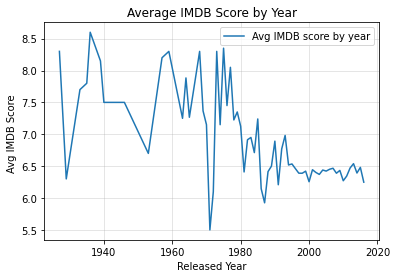

In [ ]:
df1 = df_dev.groupby('title_year')['imdb_score'].mean() # transform data using groupby
df1.plot( label='Avg IMDB score by year')
plt.legend()
plt.xlabel('Released Year')
plt.ylabel('Avg IMDB Score ')
plt.title('Average IMDB Score by Year')
plt.grid(alpha = 0.4)
plt.show()

### Boxplot for numerical data

* It is a great way to show the visual of how data is distributed. 
* It is good way to visualise numerical data
* Also called box and whisker plot
* Box plot shows shape of distribution and easily separate outliers
* Easily shows minimum, maximum, median, lower quartile Q1, upper quartile Q3, interquartile range(IQR), outlier lower limit(Q1 - 1.5*IQR), outlier upper limit(Q3 + 1.5*IQR). 
* If data is positive skewed than median will be near to the bottom of the box and for negative skew data median will be near to the top of the box
* For normal distributed data median is in the middle of box.

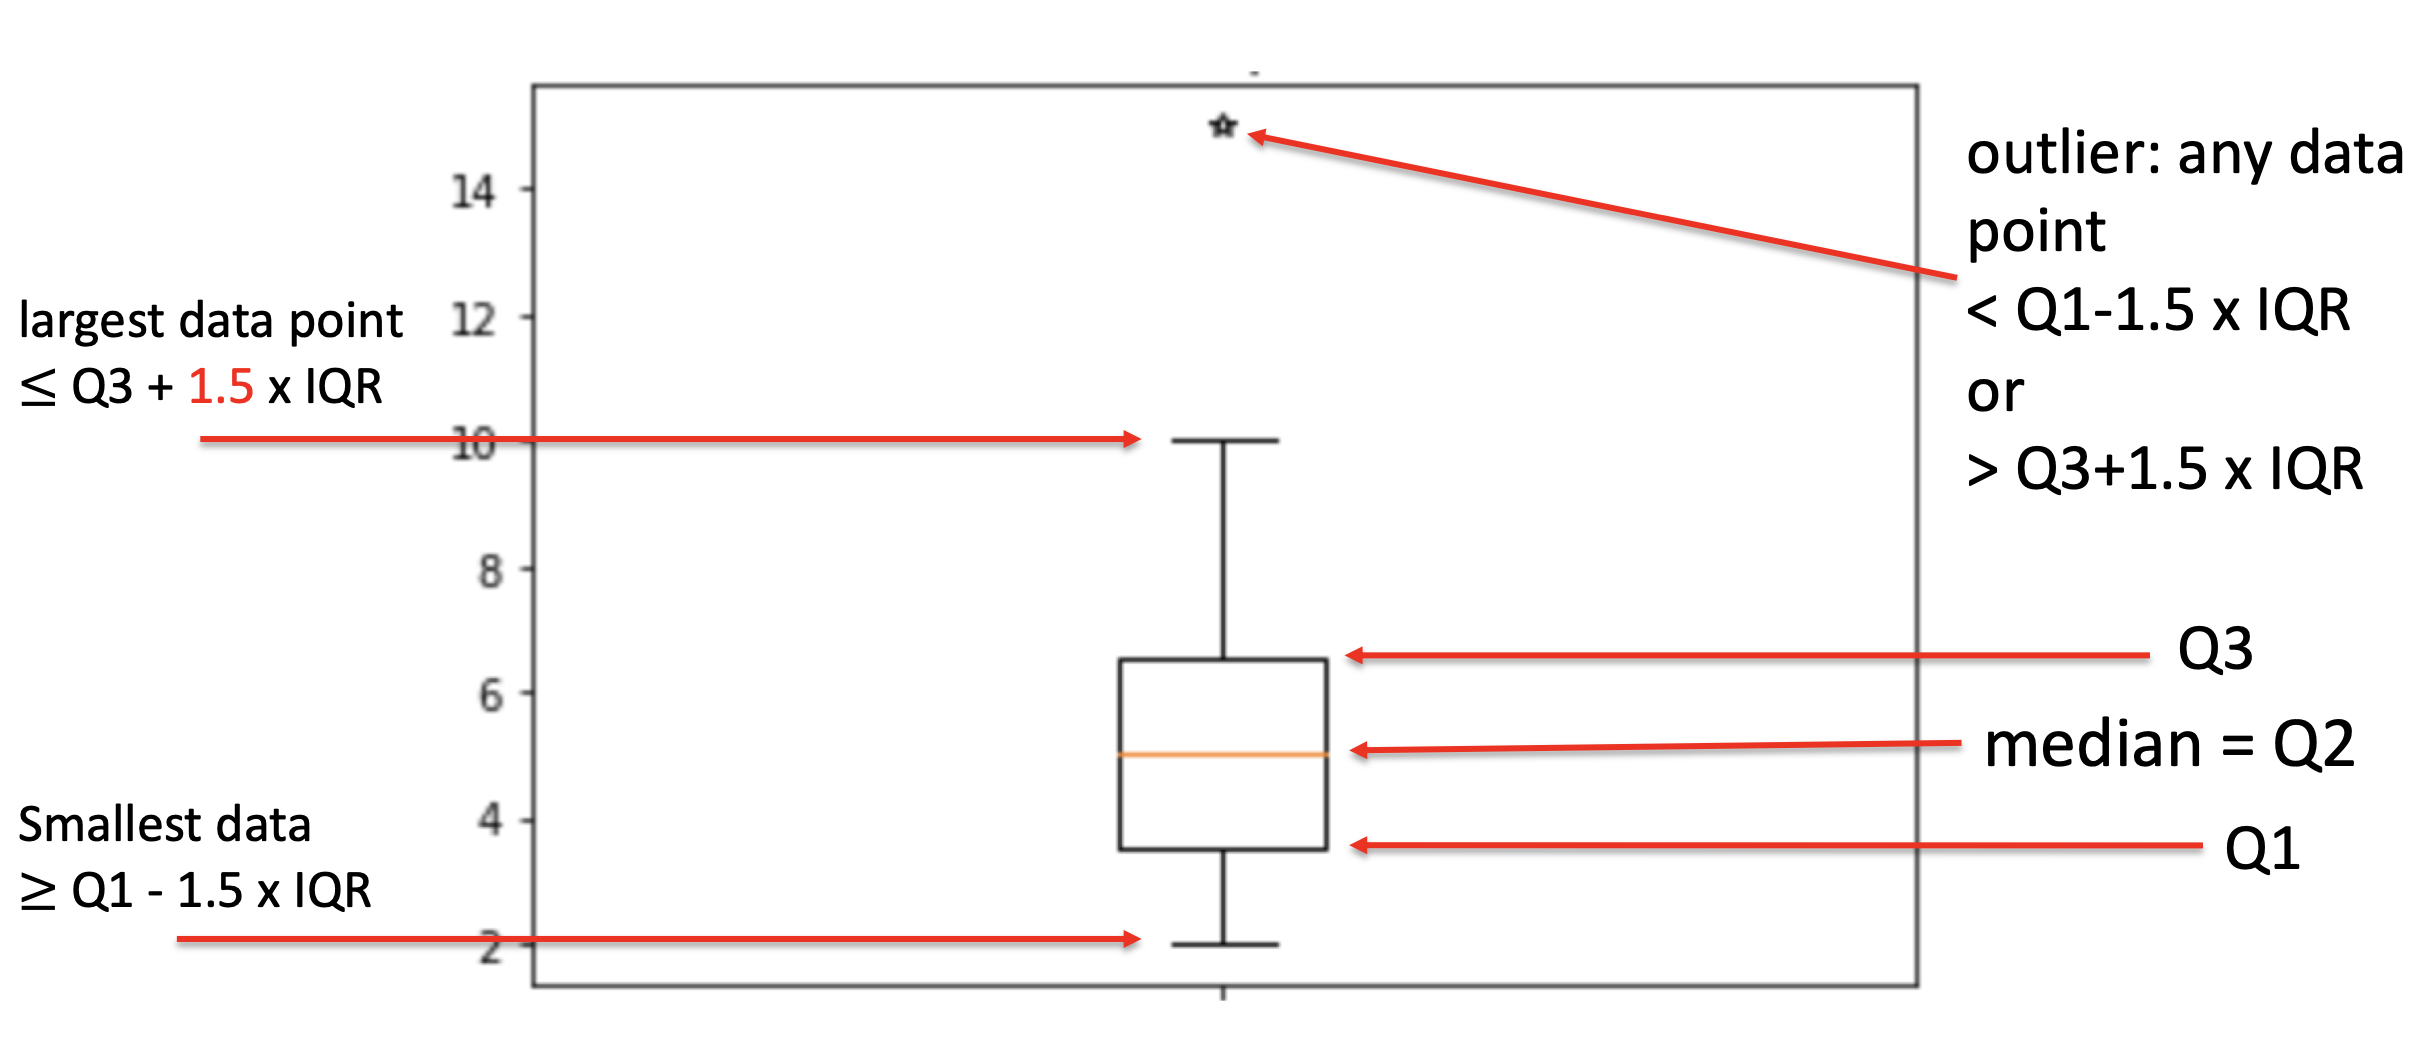



Q1 25 percentile means 25% of values lie below that.

Q2 or median 50 percentile represent 50% of variable values are below that line

Q3 75 percentile is only 25% values are above that line
 

### Boxplot to show movie duration in minutes

Below boxplot shows the movie duration in minutes. We can see any point below the outlier lower limit and above the outlier upper limit is considered as outlier.

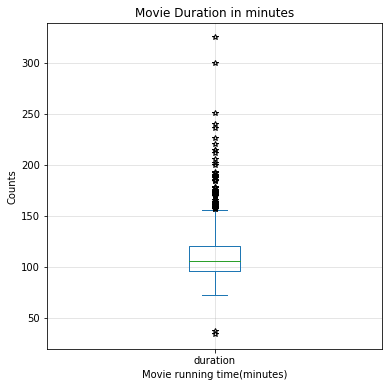

Mean: 109.82219938335047
Median: 106.0
Interquartile Range: 24.0
Lower Quartile: 96.0
Upper Quartile: 120.0
Outliers Upper limit: 156.0
Outliers lower limit: 60.0


In [ ]:
fig, ax = plt.subplots(figsize=(6,6))

df_dev['duration'].plot(kind='box', sym = '*', whis = 1.5, ax = ax)
plt.xlabel('Movie running time(minutes)')
plt.ylabel('Counts')
plt.title('Movie Duration in minutes')
plt.grid(alpha = 0.4)
plt.show()

mean = np.nanmean(df_dev['duration'])
median = np.nanmedian(df_dev['duration'])
upper_quartile = np.nanpercentile(df_dev['duration'], 75)
lower_quartile = np.nanpercentile(df_dev['duration'], 25)

iqr = upper_quartile - lower_quartile
print(f"Mean: {mean}\nMedian: {median}\nInterquartile Range: {iqr}\nLower Quartile: {lower_quartile}\nUpper Quartile: {upper_quartile}\nOutliers Upper limit: {upper_quartile+1.5*iqr}\nOutliers lower limit: {lower_quartile-1.5*iqr}")

### Boxplot for Budget

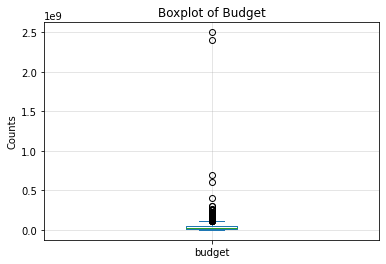

In [ ]:
#filtered_budget = df['budget'][~np.isnan(df['budget'])]
df_dev['budget'].plot(kind = 'box', sym = 'o', whis = 1.5)
plt.title('Boxplot of Budget')
plt.ylabel('Counts')
plt.grid(alpha = 0.4)
plt.show()

I will draw above graph on logarithmic scale for better visualization. There are at least 2 different ways to do this 1) use the map function to create a column with all of the log(budget) values in 2) set a parameter in the call to the boxplot method.

When we use to set logx or logy parameter, it use natural log scale and if we use map function with np.log10, it is log10 scale so we can see difference on x or y axis ticks labels. 

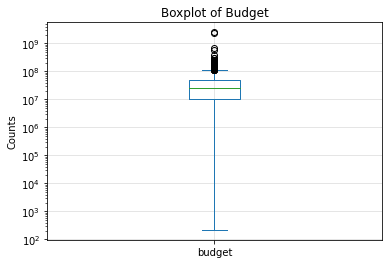

In [ ]:
df_dev['budget'].plot(kind='box', logy = True) 
plt.title('Boxplot of Budget')
plt.ylabel('Counts')
plt.grid(alpha = 0.4)
plt.show()

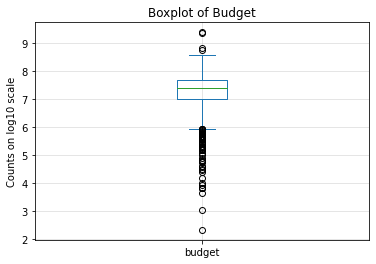

In [ ]:
df_dev['budget'].map(np.log10).plot(kind='box')
plt.title('Boxplot of Budget')
plt.ylabel('Counts on log10 scale')
plt.grid(alpha = 0.4)
plt.show()

The difference is in map function we use log10 and in 'plot(logy = True)' we are using log() natural log.

### IMDB Score Distribution
IMDB Score distribution is slightly negative skewed as I explored from below histogram and boxplot visualization of IMDB Score

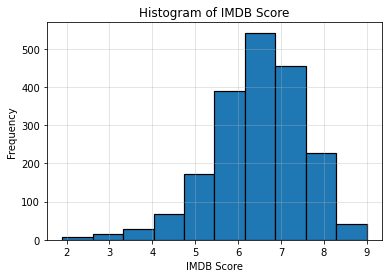

In [ ]:
ax = df_dev['imdb_score'].plot(kind='hist', edgecolor='black', linewidth=1.2)
ax.set_xlabel("IMDB Score")
ax.set_title("Histogram of IMDB Score")
ax.set_ylabel("Frequency")

plt.grid(alpha = 0.4)
plt.show()

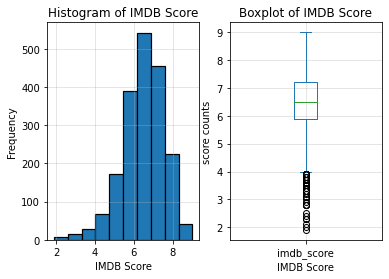

In [ ]:
plt.subplot(121)
ax1 = df_dev['imdb_score'].plot(kind='hist', edgecolor='black', linewidth=1.2)
ax1.set_xlabel("IMDB Score")
ax1.set_title("Histogram of IMDB Score")
ax1.set_ylabel("Frequency")
plt.grid(alpha = 0.4)

plt.subplot(122)
ax2 = df_dev['imdb_score'].plot(kind = 'box', sym = 'o', whis = 1.5)
ax2.set_xlabel("IMDB Score")
ax2.set_title("Boxplot of IMDB Score")
ax2.set_ylabel("score counts")
plt.grid(alpha = 0.4)


plt.show()

### Scatter plot to show relation between Budget and IMDB Score

From the below scatterplot, we can say that there is no any relation between these two variable

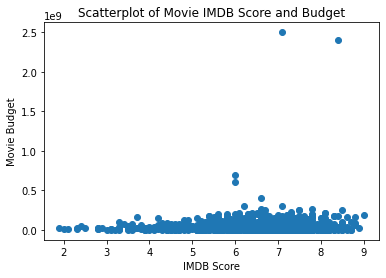

In [ ]:
# scatter plot to show correlation between two variables
plt.scatter(df_dev['imdb_score'], df_dev['budget'])
plt.xlabel('IMDB Score')
plt.ylabel('Movie Budget')
plt.title('Scatterplot of Movie IMDB Score and Budget')

plt.show()


### Scatter plot for Movie Budget and Profit

In [ ]:
df_profit = df_dev.groupby('budget')[['profit']].mean()
top_profit = df_profit.sort_values('profit', ascending=False)
top_profit

,profit
budget,
2.200000e+08,4.032795e+08
5.880000e+07,2.913236e+08
1.130000e+08,2.672626e+08
1.390000e+08,2.647064e+08
9.400000e+07,2.464789e+08
...,...
4.000000e+08,-3.995457e+08
6.000000e+08,-5.983975e+08
7.000000e+08,-6.967246e+08


From the below scatter plot it is visible that high budget is not guarantee to profit of movie. Most of the low budget movies have high profit.

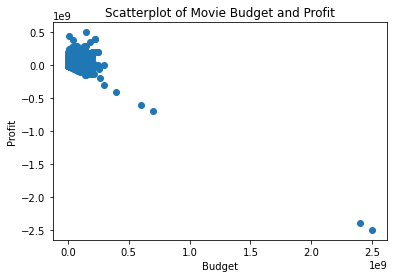

In [ ]:
# scatter plot to show correlation between two variables
plt.scatter(df_dev['budget'], df_dev['profit'])
plt.xlabel('Budget')
plt.ylabel('Profit')
plt.title('Scatterplot of Movie Budget and Profit')

plt.show()

### Scatter plot for Gross and Number of User for Review

From below plot we can say that number of user reviews and gross are slightly related.

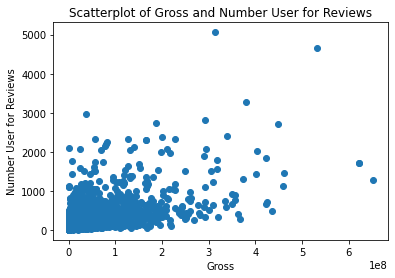

In [ ]:
plt.scatter(df_dev['gross'], df_dev['num_user_for_reviews'])
plt.xlabel('Gross')
plt.ylabel('Number User for Reviews')
plt.title('Scatterplot of Gross and Number User for Reviews')

plt.show()

### Bar Plot for Movie Facebook Likes grouped by Genres

I examined that there are so many genres whose movie facebook likes are more than 10000. Drama|Western genres has highest likes 200000.

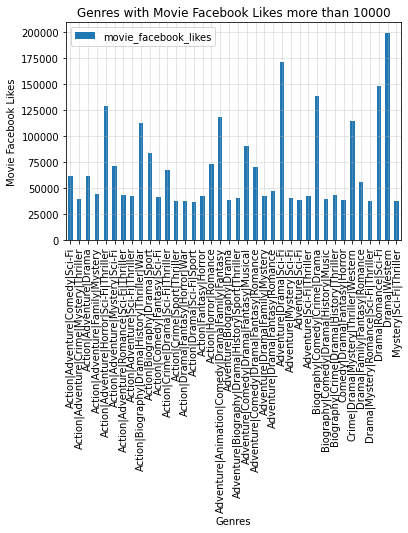

In [ ]:
genre_facebook_df = df_dev.groupby('genres')[['movie_facebook_likes']].mean()
# I am interested in movie facebook like more than 10000
n = 10000 
genre_facebook_df2 = genre_facebook_df[genre_facebook_df['movie_facebook_likes']>n]
n_75=np.percentile(genre_facebook_df2,75)  # this will filter out top 25% genres with movie facebook likes >10000
genre_facebook_df2[genre_facebook_df2['movie_facebook_likes']>n_75].plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Movie Facebook Likes')
plt.title('Genres with Movie Facebook Likes more than 10000')
plt.grid(alpha = 0.4)
plt.show()

### Bar chart for top 10 Profitable Movies



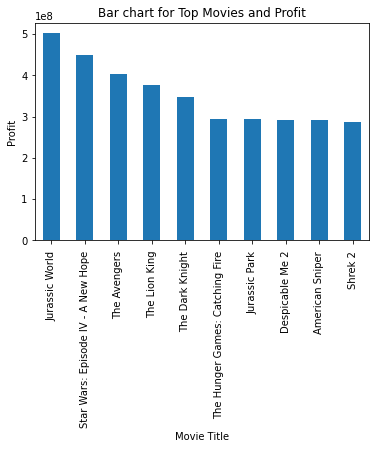

In [ ]:
movie_df = df_dev.groupby('movie_title')[['profit']].mean()

top_movie_df = movie_df.sort_values('profit', ascending = False)
 
# nlargest() will filter top 10 values from profit column
top_movie_df['profit'].nlargest(10).plot(kind='bar')
plt.xlabel('Movie Title')
plt.ylabel('Profit')
plt.title('Bar chart for Top Movies and Profit')

plt.show()

### Bar chart of Top 10 Directors with Movie Facebook Likes

I found that Director Colin Trevorrow has highest movie facebook likes

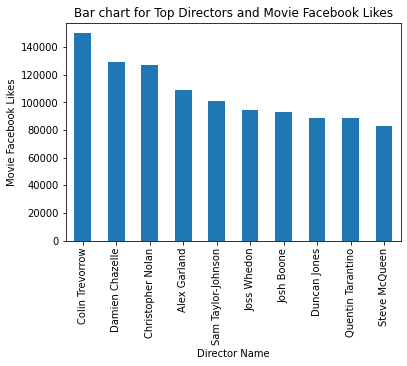

In [ ]:
dir_mf_likes=df_dev.loc[:,['director_name','movie_facebook_likes']] # make dataframe with just director and movie facebook likes data

counts_dir=dir_mf_likes.groupby('director_name')[['movie_facebook_likes']].mean()
top_dir = counts_dir.sort_values('movie_facebook_likes', ascending = False)

top_dir['movie_facebook_likes'].nlargest(10).plot(kind='bar')
plt.xlabel('Director Name')
plt.ylabel('Movie Facebook Likes')
plt.title('Bar chart for Top Directors and Movie Facebook Likes')

plt.show()

### Relationship between variables

we can use dataframe.corr() method to see pairwise correlation between all the variables. Positive number demonstrates that as one variable increases, the other tends to as well. While Negative number shows the opposite. Closer to one or negative one shows stronger the relationship. It is also referred to as correlation matrix and it's often a good first step before performing machine learning or statistical modeling. 

In [ ]:
df_dev.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
num_critic_for_reviews,1.000000,0.258640,0.235244,0.302018,0.142204,0.484575,0.628143,0.222279,-0.032901,0.594554,0.213729,0.389573,0.254045,0.341596,0.143345,0.707043,0.149875
duration,0.258640,1.000000,0.221596,0.138922,0.065710,0.261946,0.343212,0.101127,0.016567,0.352397,0.199111,-0.110019,0.104259,0.362305,0.134585,0.242515,0.003719
director_facebook_likes,0.235244,0.221596,1.000000,0.140356,0.074875,0.169656,0.380053,0.110156,-0.041699,0.284065,0.088719,0.003777,0.116930,0.199657,0.047892,0.273569,0.039627
actor_3_facebook_likes,0.302018,0.138922,0.140356,1.000000,0.227350,0.375892,0.332801,0.451283,0.108820,0.264246,0.152515,0.127704,0.532453,0.083633,0.042191,0.335677,0.128426
actor_1_facebook_likes,0.142204,0.065710,0.074875,0.227350,1.000000,0.118759,0.147963,0.951943,0.075720,0.100721,0.053492,0.097877,0.347306,0.062209,0.034828,0.105958,0.035685
gross,0.484575,0.261946,0.169656,0.375892,0.118759,1.000000,0.652238,0.223218,-0.030998,0.539942,0.278777,0.058189,0.262499,0.220865,0.056585,0.393212,0.459393
num_voted_users,0.628143,0.343212,0.380053,0.332801,0.147963,0.652238,1.000000,0.231208,-0.025350,0.802900,0.201302,0.043781,0.248959,0.471901,0.066822,0.549061,0.281623
cast_total_facebook_likes,0.222279,0.101127,0.110156,0.451283,0.951943,0.223218,0.231208,1.000000,0.095814,0.168227,0.093933,0.128967,0.590367,0.081208,0.047332,0.193995,0.073221
facenumber_in_poster,-0.032901,0.016567,-0.041699,0.108820,0.075720,-0.030998,-0.025350,0.095814,1.000000,-0.070687,-0.032357,0.060946,0.080434,-0.052144,0.003396,0.011347,0.007695
num_user_for_reviews,0.594554,0.352397,0.284065,0.264246,0.100721,0.539942,0.802900,0.168227,-0.070687,1.000000,0.194329,0.031960,0.191956,0.344264,0.085427,0.402420,0.207530


To make this correlation matrix easier to interprete I created heat map from this matrix.

In [ ]:
df_dev.corr().style.background_gradient(cmap = 'YlGnBu_r', axis = None)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
num_critic_for_reviews,1.000000,0.258640,0.235244,0.302018,0.142204,0.484575,0.628143,0.222279,-0.032901,0.594554,0.213729,0.389573,0.254045,0.341596,0.143345,0.707043,0.149875
duration,0.258640,1.000000,0.221596,0.138922,0.065710,0.261946,0.343212,0.101127,0.016567,0.352397,0.199111,-0.110019,0.104259,0.362305,0.134585,0.242515,0.003719
director_facebook_likes,0.235244,0.221596,1.000000,0.140356,0.074875,0.169656,0.380053,0.110156,-0.041699,0.284065,0.088719,0.003777,0.116930,0.199657,0.047892,0.273569,0.039627
actor_3_facebook_likes,0.302018,0.138922,0.140356,1.000000,0.227350,0.375892,0.332801,0.451283,0.108820,0.264246,0.152515,0.127704,0.532453,0.083633,0.042191,0.335677,0.128426
actor_1_facebook_likes,0.142204,0.065710,0.074875,0.227350,1.000000,0.118759,0.147963,0.951943,0.075720,0.100721,0.053492,0.097877,0.347306,0.062209,0.034828,0.105958,0.035685
gross,0.484575,0.261946,0.169656,0.375892,0.118759,1.000000,0.652238,0.223218,-0.030998,0.539942,0.278777,0.058189,0.262499,0.220865,0.056585,0.393212,0.459393
num_voted_users,0.628143,0.343212,0.380053,0.332801,0.147963,0.652238,1.000000,0.231208,-0.025350,0.802900,0.201302,0.043781,0.248959,0.471901,0.066822,0.549061,0.281623
cast_total_facebook_likes,0.222279,0.101127,0.110156,0.451283,0.951943,0.223218,0.231208,1.000000,0.095814,0.168227,0.093933,0.128967,0.590367,0.081208,0.047332,0.193995,0.073221
facenumber_in_poster,-0.032901,0.016567,-0.041699,0.108820,0.075720,-0.030998,-0.025350,0.095814,1.000000,-0.070687,-0.032357,0.060946,0.080434,-0.052144,0.003396,0.011347,0.007695
num_user_for_reviews,0.594554,0.352397,0.284065,0.264246,0.100721,0.539942,0.802900,0.168227,-0.070687,1.000000,0.194329,0.031960,0.191956,0.344264,0.085427,0.402420,0.207530


By the correlation matrix I easily interprete that 

* num_critic_for_review is positively correlated with movie_facebook_likes with 0.70
* gross is related with num_voted_users with 0.65 value
* Budget is surprisingly negative correlated with profit -0.72 that means high budget is more promised guarantee for more profit

### Top Genres with budget less than 1.5 milloins

If we 'groupby' the 'genres' and then count key identifiers within each group, we get a frequency table with more key insights. We are interested in budget 1.5 million GBP, so I am going to find out top 50% genres in this budget range.

In [ ]:
genre_budget_df = df_dev.groupby('genres')[['budget']].mean()
# we are interested to 1.5 million budget
n = 1500000 
genre_budget_df2 = genre_budget_df[genre_budget_df['budget']<=n]
genre_budget_df2

,budget
genres,
Action|Adventure|Animation|Comedy|Fantasy|Sci-Fi,7.500000e+05
Action|Drama,6.750000e+05
Adventure|Biography|Documentary|Drama,1.000000e+06
Adventure|Comedy|Horror,1.400000e+06
Adventure|Horror|Sci-Fi,2.100000e+05
Biography|Comedy|Romance,6.000000e+04
Biography|Crime|Documentary|History|Thriller,1.000000e+06
Biography|Documentary,2.180000e+02
Comedy|Crime|Horror,1.000000e+04


There are some good genres options that I can choose to suggest company

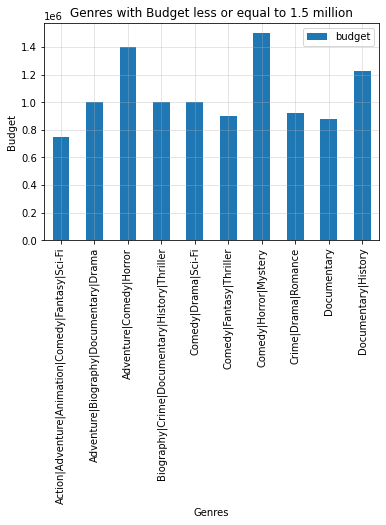

In [ ]:

n_50=np.percentile(genre_budget_df2,50)  # this will filter out top 50% genres in budget 1.5 million
genre_budget_df2[genre_budget_df2['budget']>n_50].plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Budget')
plt.title('Genres with Budget less or equal to 1.5 million')
plt.grid(alpha = 0.4)
plt.show()

In [ ]:
# Top 25% genres in budget 1.5 million
n_75=np.percentile(genre_budget_df2,75)
genre_budget_df3 = genre_budget_df2[genre_budget_df2['budget']>n_75]
genre_budget_df3

,budget
genres,
Adventure|Comedy|Horror,1400000.0
Comedy|Horror|Mystery,1500000.0
Documentary|History,1225000.0


### Top 25% Genres with IMDB Score 8 or more than 8

Now I will find out which genres have imdb score 8 or more than 8 and top 25% genres with imdb score 8 or more than 8.

In [ ]:
genre_imdb_df = df_dev.groupby('genres')[['imdb_score']].mean()
# we are interested to high imdb score
n = 8
genre_imdb_df2 = genre_imdb_df[genre_imdb_df['imdb_score']>=n]
genre_imdb_df2.head()

,imdb_score
genres,
Action|Adventure|Animation|Comedy|Drama|Family|Sci-Fi,8.0
Action|Adventure|Animation|Family,8.0
Action|Biography|Drama|Sport,8.1
Adventure|Animation|Comedy|Drama|Family|Fantasy,8.3
Adventure|Animation|Drama|Family|Musical,8.5


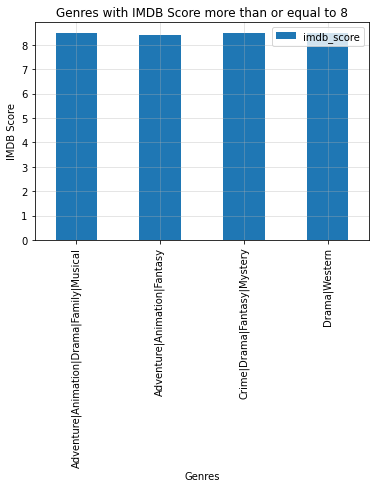

In [ ]:
n_75=np.percentile(genre_imdb_df2,75)  # this will filter out top 25% genres in imdb score more than 8
genre_imdb_df2[genre_imdb_df2['imdb_score']>n_75].plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('IMDB Score')
plt.title('Genres with IMDB Score more than or equal to 8')
plt.grid(alpha = 0.4)
plt.show()

### Top Genres counts with IMDB Score 

Below I examined which genres have more number of movie counts in respect to imdb score. I found that Drama|Ronamce, Drama, Comedy|Romance have good ratings.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'imdb score')

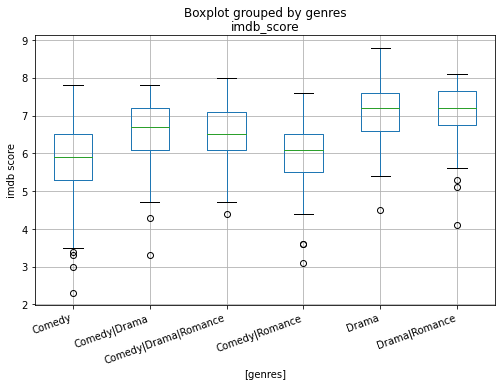

In [ ]:
genres_imdb_score=df_dev.loc[:,['genres','imdb_score']] # make dataframe with just genres and imdb score data

counts_score=genres_imdb_score.groupby('genres').count().reset_index('genres')

movie_count=50 #set the number we consider to be 'big' in terms of films made so that we can plot just a reasonable number of score counts here

bigcounts_score=counts_score[counts_score.imdb_score>movie_count]['genres'] # make index by frequency
big_genre_df1 = genres_imdb_score[genres_imdb_score.genres.isin(bigcounts_score)] # use frequency index to make new dataframe with just 'big genres'

# create visualization
chart = big_genre_df1.boxplot(by='genres', figsize=(8,5)) # plot it
chart.set_xticklabels(chart.get_xticklabels(), rotation = 20, horizontalalignment='right')
chart.set_ylabel('imdb score')

In [ ]:
bigcounts_score

317                  Comedy
335            Comedy|Drama
357    Comedy|Drama|Romance
395          Comedy|Romance
437                   Drama
485           Drama|Romance
Name: genres, dtype: object

In [ ]:
big_genre_df1.head()

,genres,imdb_score
2986,Drama|Romance,7.1
2572,Drama,7.7
3389,Comedy|Romance,7.1
2559,Comedy|Drama,4.9
1829,Comedy|Drama,5.7


### Top Genres with IMDB Score and Budget and Profit

Now I sort the mean imdb score and budget across films by genre. Set a minimum imdb score and filter according to that. I am interested only in high scores so I am only looking at films with good ratings. 

In [ ]:
genreseries=df_dev.groupby('genres')[['imdb_score','budget']].mean()
#set the minimum imdb score that I care about to 8
min_imdb_score=8 
top_rated_genre = genreseries[genreseries['imdb_score']>min_imdb_score]
top_rated_genre = top_rated_genre.sort_values('imdb_score', ascending=False)
#print the genres for inspection
top_rated_genre.head(10)

,imdb_score,budget
genres,,
Adventure|Animation|Drama|Family|Musical,8.50,4.500000e+07
Crime|Drama|Fantasy|Mystery,8.50,6.000000e+07
Drama|Western,8.50,1.000000e+08
Adventure|Animation|Fantasy,8.40,2.400000e+09
Adventure|Animation|Family|Fantasy,8.40,2.150000e+07
Adventure|Animation|Comedy|Drama|Family|Fantasy,8.30,1.750000e+08
Documentary|War,8.30,2.000000e+06
Adventure|Drama|War,8.25,3.900000e+07
Biography|Comedy|Crime|Drama,8.20,1.000000e+08




There appears to be some well-rated genres that we could propose as better options to make a film. To examine if any of these good film genres can be made within our budget, I filtered by a maximum 1500000 and looked at the gross return and profit.

In [ ]:
#set the maximum possible budget to 1500 000
max_budget = 1500000
topgenreseries=df_dev.groupby('genres')[['imdb_score','budget','gross', 'profit']].mean()
#find the details of films with less than the maximum budget
budget_genres = topgenreseries[topgenreseries['budget']<max_budget]
budget_genres = budget_genres.sort_values('imdb_score',ascending=False)
budget_genres.head()

,imdb_score,budget,gross,profit
genres,,,,
Documentary|History|Music,7.80,400000.0,6757592.5,6357592.5
Biography|Crime|Documentary|History|Thriller,7.80,1000000.0,2957978.0,1957978.0
Documentary|History,7.65,1225000.0,584100.0,-640900.0
Adventure|Biography|Documentary|Drama,7.60,1000000.0,287761.0,-712239.0
Biography|Documentary,7.20,218.0,592014.0,591796.0


In [ ]:
budget_genres

,imdb_score,budget,gross,profit
genres,,,,
Documentary|History|Music,7.800000,4.000000e+05,6.757592e+06,6357592.5
Biography|Crime|Documentary|History|Thriller,7.800000,1.000000e+06,2.957978e+06,1957978.0
Documentary|History,7.650000,1.225000e+06,5.841000e+05,-640900.0
Adventure|Biography|Documentary|Drama,7.600000,1.000000e+06,2.877610e+05,-712239.0
Biography|Documentary,7.200000,2.180000e+02,5.920140e+05,591796.0
Crime|Drama|Romance,7.200000,9.250000e+05,1.913116e+06,988116.0
Comedy|Family|Musical|Romance|Short,7.100000,3.400000e+04,3.336580e+05,299658.0
Documentary,6.907692,8.804692e+05,3.288702e+05,-551599.0
Action|Adventure|Animation|Comedy|Fantasy|Sci-Fi,6.900000,7.500000e+05,5.518918e+06,4768918.0


The Documentary|History|Music genre seems to be well-rated and within our budget. Taking a look at the details more closely we can see that there is actually only two movies that meets the criteria of budget and imdb rating. Both movies has profit.

In [ ]:
df_dev[df_dev['genres']=='Documentary|History|Music']

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
4904,Color,Justin Dillon,7.0,86.0,0.0,15.0,Natasha Bedingfield,178.0,215185.0,Documentary|History|Music,...,English,USA,PG-13,200000.0,2008.0,58.0,7.5,1.85,26,15185.0
4708,Color,Michael Wadleigh,53.0,215.0,14.0,136.0,Jimi Hendrix,262.0,13300000.0,Documentary|History|Music,...,English,USA,R,600000.0,1970.0,227.0,8.1,2.20,0,12700000.0


I examined other genres options aloso from the above table results that are showing profits.

In [ ]:
df_dev[df_dev['genres']=='Biography|Crime|Documentary|History|Thriller']

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
4353,Color,James Marsh,194.0,90.0,120.0,0.0,Philippe Petit,41.0,2957978.0,Biography|Crime|Documentary|History|Thriller,...,English,UK,PG-13,1000000.0,2008.0,27.0,7.8,1.85,0,1957978.0


In [ ]:
df_dev[df_dev['genres'] == 'Crime|Drama|Romance']

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
4398,Color,François Truffaut,35.0,123.0,0.0,21.0,Jean-Paul Belmondo,963.0,26893.0,Crime|Drama|Romance,...,French,France,R,1600000.0,1969.0,710.0,7.2,2.35,278,-1573107.0
4855,Color,Justin Lin,51.0,98.0,681.0,13.0,Jason Tobin,94.0,3799339.0,Crime|Drama|Romance,...,English,USA,R,250000.0,2002.0,26.0,7.2,1.85,661,3549339.0


In [ ]:
df_dev[df_dev['genres'] == 'Thriller']

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
5034,Color,Neill Dela Llana,35.0,80.0,0.0,0.0,Edgar Tancangco,0.0,70071.0,Thriller,...,English,Philippines,Not Rated,7000.0,2005.0,0.0,6.3,1.85,74,63071.0


### Visualization of Genres with IMDB Score, Budget and Gross

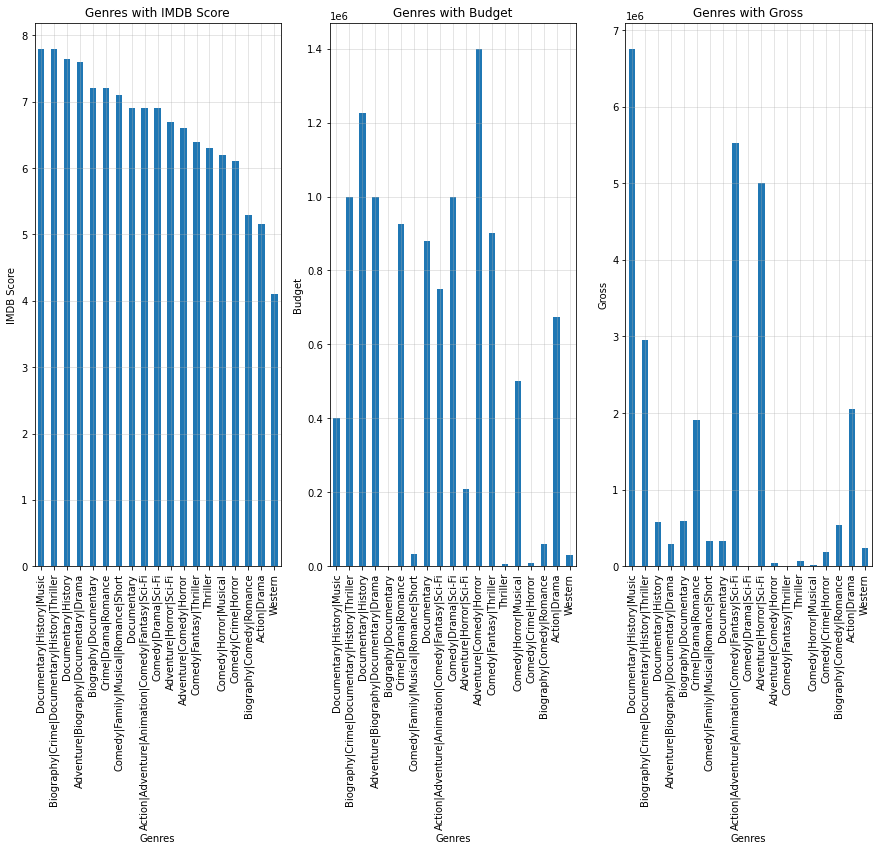

In [ ]:
plt.figure(figsize=(15,10))
# subplot1
plt.subplot(131)
budget_genres['imdb_score'].plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('IMDB Score')
plt.title('Genres with IMDB Score')
plt.grid(alpha = 0.4)

#subplot2
plt.subplot(132)
budget_genres['budget'].plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Budget')
plt.title('Genres with Budget')
plt.grid(alpha = 0.4)

#subplot3
plt.subplot(133)
budget_genres['gross'].plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Gross')
plt.title('Genres with Gross')
plt.grid(alpha = 0.4)
plt.show()

## Constructing Hypothesis

1. If 'Documentary|History|Music' genre has less budget, more profit and than 'Biography|Crime|Documentary|History|Thriller' then 'Documentary|History|Music' genre will be a good option for making movie within our budget of 1.5 millions.

**Null hypothesis(H0):** 'Documentary|History|Music' genre does not have more profit than 'Biography|Crime|Documentary|History|Thriller'

**Alternative hypothesis(H1):** 'Documentary|History|Music' genre can make more profit than 'Biography|Crime|Documentary|History|Thriller'

I don't have these genres combinations in my test dataset so I will check another options those are in test set and If I will not find appropriate solution then I will consider whole dataset for testing purpose on this hypothesis.

2. If 'Crime|Drama|Romance' genre has more profit and more imdb score than 'Thriller' then 'Crime|Drama|Romance' genre will be a good option for making movie with in our budget which is 1.5 millions GBP.

**Null hypothesis(H0):** 'Crime|Drama|Romance' genre does not have more profit than 'Thriller'

**Alternative hypothesis(H1):** 'Crime|Drama|Romance' genre can make more profit than 'Thriller'

### Hypothesis Testing for option 2

####First I check second hypothesis 

Sample size is less than 30 I use t-distribution to find p-value. I will  choose t-distribution test for hypothesis testing.

In [ ]:
from scipy import stats
genre_budget_means=df_test.groupby('genres')['budget'].mean()
genre_budget_std=df_test.groupby('genres')['budget'].std()
genre_budget_count=df_test.groupby('genres')['budget'].count()

P_G = (genre_budget_means['Crime|Drama|Romance']-1500000)/(genre_budget_std['Crime|Drama|Romance']/np.sqrt(genre_budget_count['Crime|Drama|Romance']))
p_value_from_t_dis=(1-stats.t.cdf(P_G, 30))
print('Mean Crime|Drama|Romance genre budget from data: ',genre_budget_means['Crime|Drama|Romance'])
print('one tail p value from t-distribution: ', p_value_from_t_dis)

Mean Crime|Drama|Romance genre budget from data:  4470000.0
one tail p value from t-distribution:  0.21830851010472352


Below i am calculating p-value by using scipy ttest function.

In [ ]:
cdr_data = df_test[df_test['genres'] == 'Crime|Drama|Romance']
cdr_budget = cdr_data['budget']
clean_cdr_budget=cdr_budget[~np.isnan(cdr_budget)] # manually clean
cdr_budget_ttest=stats.ttest_1samp(cdr_budget,1500000,nan_policy='omit') # or rely on function behaviour "omit"
one_tail_p = cdr_budget_ttest.pvalue/2 # divide by 2 because the function uses a 2 tail test
print('one_tail p from scipy: ', one_tail_p)

one_tail p from scipy:  0.25652258584398935


Below I'm comparing budget of 'Crime|Drama|Romance' and 'Thriller' genres.

One tail p-value diffrence between 'Crime|Drama|Romance' and 'Thriller' genres from t-distribution is 0.178

In [ ]:
combinederror=(((genre_budget_std['Crime|Drama|Romance']**2)/genre_budget_count['Crime|Drama|Romance'])+((genre_budget_std['Thriller']**2)/genre_budget_count['Thriller']))**0.5   
z=(genre_budget_means['Crime|Drama|Romance']-genre_budget_means['Thriller'])/combinederror

p_value_from_t_for_diff = (1-stats.t.cdf(z, 30))
print('one_tail Crime|Drama|Romance-Thriller difference: ', p_value_from_t_for_diff)

one_tail Crime|Drama|Romance-Thriller difference:  0.17838873704072444


Finally, here is the same example but using the scipy ttest_ind_from_stats function. The optional flag 'equal_var' is set to False. This means that the test conducted will be Welch's ttest. Welch's t-test is insensitive to equality of the variances regardless of whether the sample sizes are similar.

In [ ]:
t_data = df_test[df_test['genres'] == 'Thriller']
t_budget = t_data['budget']
clean_t_budget=t_budget[~np.isnan(t_budget)]
cdr_v_t_budget_ttest=stats.ttest_ind_from_stats(cdr_budget.mean(),cdr_budget.std(),cdr_budget.count(),t_budget.mean(),t_budget.std(),t_budget.count(),equal_var=False)
one_tail_diff_p = cdr_v_t_budget_ttest.pvalue/2
print ('one_tail Crime|Drama|Romance-Thriller difference from scipy: ', one_tail_diff_p)

one_tail Crime|Drama|Romance-Thriller difference from scipy:  0.22201944645792043


## Bootstrapping

Now, I will apply bootstrapping on small dataset. First, I will create small dataset with 10 items of 'Gross' column of dataset.

In [ ]:
smallsample=df_test['gross'].dropna()[:10]
smallsample

0     760505847.0
2     200074175.0
6     336530303.0
9     301956980.0
10    330249062.0
15    291021565.0
16    141614023.0
19    179020854.0
21    262030663.0
23    258355354.0
Name: gross, dtype: float64

Now, I create a bootstrap sample from 'smallsample'

In [ ]:
import random
def bootstrap_sample(data):
    return [random.choice((data)) for _ in data]

smallsample = np.array(smallsample)

bootstrap_sample(smallsample)

[179020854.0,
 258355354.0,
 141614023.0,
 179020854.0,
 760505847.0,
 262030663.0,
 179020854.0,
 291021565.0,
 200074175.0,
 291021565.0]

Now I will create 1001 bootstrap samples from the 'smallsample' data set. Then I will calculate the median of each of these bootstrap samples. Next I will calculate the mean (of the medians) and the upper and lower bounds of the CI from the 1001 bootstrapped samples

In [ ]:
bsmedian=[]
for i in range(1001):
    bs=bootstrap_sample(smallsample)
    bsmedian.append(np.median(bs))

bsmedian_array=np.array(bsmedian)
print ("Bootstrapped Mean (of the median): ", np.mean(bsmedian_array))
print ("Bootstrapped CI Lower bound: ", np.percentile(bsmedian_array,2.5))
print ("Bootstrapped CI Upper bound: ", np.percentile(bsmedian_array,97.5))

Bootstrapped Mean (of the median):  275345499.4070929
Bootstrapped CI Lower bound:  200074175.0
Bootstrapped CI Upper bound:  330249062.0


Now I will create 1001 bootstrap samples from the 'clean_cdr_budget' data set. I will calculate the mean of each of these bootstrap samples and then calculate the mean of these bootstrap means and the upper and lower bounds of the CI

In [ ]:
cdr_budget_sample = np.array(clean_cdr_budget)

bsmean=[]
for i in range(1001):
    bs=bootstrap_sample(cdr_budget_sample)
    bsmean.append(np.mean(bs))

bsmean_array=np.array(bsmean)
print ("Bootstrapped Mean: ", np.mean(bsmean_array))
print ("Bootstrapped CI Lower bound: ", np.percentile(bsmean_array,2.5))
print ("Bootstrapped CI Upper bound: ", np.percentile(bsmean_array,97.5))

Bootstrapped Mean:  4584072.594072594
Bootstrapped CI Lower bound:  500000.0
Bootstrapped CI Upper bound:  12000000.0


I will compare bootstrapped CI with the CI assocaited with the mean of the 'clean_cdr_budget' data set

In [ ]:
#in general using 1.96 because it is z value for 95% confidence intervals
cdr_error = clean_cdr_budget.std()/clean_cdr_budget.count()**0.5
lower_CI = cdr_budget.mean()-cdr_error*1.96 
upper_CI = cdr_budget.mean()+cdr_error*1.96

print ("CI Lower bound: ", lower_CI)
print ("CI Upper bound: ", upper_CI)

CI Lower bound:  -2913045.3590190914
CI Upper bound:  11853045.359019091


Another alternative way of calculating the CI assocaited with the mean of the 'clean_bdm_budget' data set is using 'scipy.norm.interval' or if sample size is small we can use 'scipy.t.interval'. I use 'scipy.t.interval'

In [ ]:
from scipy import stats
stats.t.interval(alpha=0.95, df=len(clean_cdr_budget)-1,loc=np.mean(clean_cdr_budget), scale=stats.sem(clean_cdr_budget))

(-11737489.933184827, 20677489.933184825)

Let's assume the standard deviation is the same for a given sample but that the size of the sample changes. Now I will check how the p-value changes with sample size.

In [ ]:
multiples = [0.5,1,1.5,2,3,5] # make up some multiples of sample sizes to see how the p-values change with changing sample size
p_values = []

for i in multiples:
    # same code as for the example given above for the real values, but with multiplier 'i' on sample size
    combinederror=(((genre_budget_std['Crime|Drama|Romance']**2)/(genre_budget_count['Crime|Drama|Romance']*i))+((genre_budget_std['Thriller']**2)/(genre_budget_count['Thriller']*i)))**0.5   
    z=(genre_budget_means['Crime|Drama|Romance']-genre_budget_means['Thriller'])/combinederror
    p_values.append(1-stats.t.cdf(z,30)) # keep a list of the output 'p-values'

Here are the p-values that we obtain from using the 6 different sample sizes

In [ ]:
p_values # quick look at p-values

[0.2565724833197698,
 0.17838873704072444,
 0.1303685665938653,
 0.09781401640714482,
 0.05773098856197523,
 0.02246223674509562]

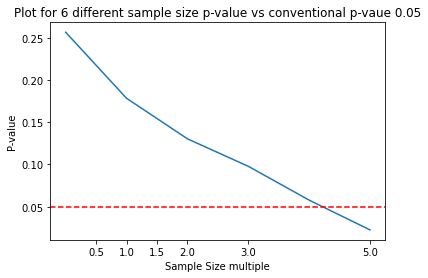

In [ ]:
#plot the potential p-values against a comparison line set at the conventional 0.05
plt.plot(p_values)
plt.axhline(y=0.05, color='r', linestyle='--')
plt.xticks(multiples)
plt.xlabel("Sample Size multiple")
plt.ylabel("P-value")
plt.title("Plot for 6 different sample size p-value vs conventional p-vaue 0.05")
plt.show()

The difference in movie budgets between 'Crime|Drama|Romance' and 'Thriller' made films, according to given the variance and sample size within budgets, returns a one-tailed p-value of ~0.17 from t distribution and from scipy 0.22 that is above our conventional cutoff of 0.05. I would therefore conclude that there is not evidence for 'Crime|Drama|Romance' genre  being more successful than 'Thriller' genre. 

As we can visualize from above graph if sample size is more enough for these two genres then we can find p-value less than 0.05.

### Hypothesis Testing for Option 1

If I choose genres 'Documentary|History|Music' and 'Biography|Crime|Documentary|History|Thriller'. 

These genres combinations are best with in budget 1.5 millions and profit is high but in the test set I don't have these genres So I continue hypothesis for these two combinations for whole dataset. Still I cann't carry on Inferential statistical test because genre 'Biography|Crime|Documentary|History|Thriller' has only one row in whole dataset so degree of freedom is 0 in this case and I will get 'nan' for p-value. I can't test this hypothesis.

In [ ]:
dhm_data = df2[df2['genres'] == 'Documentary|History|Music']
dhm_budget = dhm_data['budget']
clean_dhm_budget=dhm_budget[~np.isnan(dhm_budget)] # manually clean
dhm_budget_ttest=stats.ttest_1samp(dhm_budget,1500000,nan_policy='omit') # or rely on function behaviour "omit"
one_tail_p = dhm_budget_ttest.pvalue/2 # divide by 2 because the function uses a 2 tail test
print('one_tail p from scipy: ', one_tail_p)

one_tail p from scipy:  0.05724914704870017


For 'Documentary|History|Music' Probability p-value is 0.057 that means I can say that 'Documentary|History|Music' genre is more profitable with in the budget limit of 1.5 millions. But I cann't compare this with the genre 'Biography|Crime|Documentary|History|Thriller'and sample size is 1 for this genre, so I don't have enough sample size. 

####Degrees of Freedom

Degrees of freedom are an integral part of inferential statistical analyses, which estimate or make inferences about population parameters based on sample data. In a calculation, degrees of freedom is the number of values which are free to vary. Degrees of freedom are important for finding critical cutoff values for inferential statistical tests. Because higher degrees of freedom generally mean larger sample sizes, a higher degree of freedom means more power to reject a false null hypothesis and find a significant result. 

We calculate degree of freedom  from a given sample size n.So degree of freedom will be n-1.

In below cells I am now finding difference for the two genres combination that I have chosen for hypothesis. But I got nan because sample size for 'Biography|Crime|Documentary|History|Thriller' genres is 1 so degree of freedom will be 0.

In [ ]:
from scipy import stats
genre_budget_means=df2.groupby('genres')['budget'].mean()
genre_budget_std=df2.groupby('genres')['budget'].std()
genre_budget_count=df2.groupby('genres')['budget'].count()

combinederror=(((genre_budget_std['Documentary|History|Music']**2)/genre_budget_count['Documentary|History|Music'])+((genre_budget_std['Biography|Crime|Documentary|History|Thriller']**2)/genre_budget_count['Biography|Crime|Documentary|History|Thriller']))**0.5   
z=(genre_budget_means['Documentary|History|Music']-genre_budget_means['Biography|Crime|Documentary|History|Thriller'])/combinederror

p_value_from_t_for_diff = (1-stats.t.cdf(z, 30))
print('one_tail Documentary|History|Music-Biography|Crime|Documentary|History|Thriller difference: ', p_value_from_t_for_diff)

one_tail Documentary|History|Music-Biography|Crime|Documentary|History|Thriller difference:  nan


Same results by using scipy ttest() function.

In [ ]:
bdt_data = df_dev[df_dev['genres'] == 'Biography|Crime|Documentary|History|Thriller']
bdt_budget = bdt_data['budget']
clean_bdt_budget=bdt_budget[~np.isnan(bdt_budget)]
dhm_v_bdt_budget_ttest=stats.ttest_ind_from_stats(dhm_budget.mean(),dhm_budget.std(),dhm_budget.count(),bdt_budget.mean(),bdt_budget.std(),bdt_budget.count(),equal_var=False)
one_tail_diff_p = dhm_v_bdt_budget_ttest.pvalue/2
print ('one_tail Crime|Drama|Romance-Thriller difference from scipy: ', one_tail_diff_p)

one_tail Crime|Drama|Romance-Thriller difference from scipy:  nan


# Summary

#### Findings

I examined the IMDB movie dataset for finding appropriate film suggestion for investment budget of 1.5 millions.

Important key insights are:
* There are 5043 rows and 28 columns in dataset.
* 45 duplicated rows I found and Remove them
* Budget column has 492 and Gross column has 884 null value but i can not replace them with 0 or mean, So I drop them and still I have 3891 rows that is 77.8%
* I add 'profit' column
* I analyse summary statistics of data
* Create visualization
  * Yearly trand of IMDB score
  * Boxplot for movie duration
  * Boxplot for budget
  * Histogram for IMDB score distribution
  * Scatter plot for IMDB score and budget
  * Scatter plot for movie budget and profit
  * scatter plot for Gross and number users for review
  * Bar Plot for Movie Facebook Likes grouped by Genres
  * Top 10 profitable movies
  * Top 10 directors with movie facebook likes
  * Correlation Matrix
  * Top Genres with movie budget 1.5 millions
  * Top 25% genres with IMDB score 8 or more than 8
  * Top Genres counts with IMDB score
  * top Genres with high IMDB score, budget 1.5 millions or less, Gross and Profit
* Construct Hypothesis 
* Hypothesis Testing


### Conclusion

I found whether there was specific genres for making film with high imdb score and within budget limit of 1.5 millions GBP. I found 'Documentary|History|music' genre more profitable and well rated than others. 

Based on the data analysis, I could recommend that Production company should make film on genre 'Documentary|History|Music'. However this conclusion is based on only two films.